In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, cross_validate, KFold
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, recall_score, confusion_matrix, classification_report

In [19]:
data = {
    'Customer Age': [22, 25, 28, 30, 34, 35, 38, 40, 42, 45, 
                     48, 50, 55, 58, 60, 62, 65, 68, 70, 75],
    'Subscribed (y)': [0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
                       1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
}

In [20]:
df = pd.DataFrame(data)

In [21]:
df.head

<bound method NDFrame.head of     Customer Age  Subscribed (y)
0             22               0
1             25               1
2             28               0
3             30               1
4             34               1
5             35               0
6             38               1
7             40               1
8             42               0
9             45               1
10            48               1
11            50               0
12            55               1
13            58               0
14            60               1
15            62               1
16            65               0
17            68               0
18            70               1
19            75               0>

In [43]:
X = df[['Customer Age']]
y = df[['Subscribed (y)']]

In [44]:
logistic = LogisticRegression()

In [45]:
logistic.fit(X,y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [46]:
ypred = logistic.predict(X)

In [57]:
print('accuracy = ', accuracy_score(y, ypred))
print('precision = ', precision_score(y, ypred))
print('f1_score = ', f1_score(y, ypred))
print(confusion_matrix(y, ypred))
print(roc_auc_score(y, ypred))

accuracy =  0.65
precision =  0.625
f1_score =  0.7407407407407407
[[ 3  6]
 [ 1 10]]
0.6212121212121212


In [59]:
fpr, tpr, thresholds = roc_curve(y, ypred)

In [63]:
fpr, tpr, thresholds

(array([0.        , 0.66666667, 1.        ]),
 array([0.        , 0.90909091, 1.        ]),
 array([inf,  1.,  0.]))

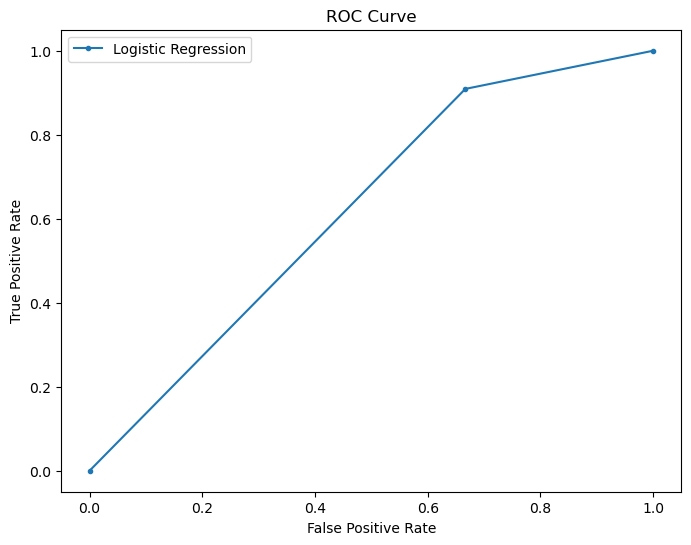

In [60]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()